In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Loading the data
banking_data = pd.read_csv("train.csv")

In [22]:
# Inspecting the first few rows
banking_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no


In [10]:
# Short summary
banking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12870 entries, 0 to 12869
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         12870 non-null  int64 
 1   age        12870 non-null  int64 
 2   job        12870 non-null  object
 3   marital    12870 non-null  object
 4   education  12870 non-null  object
 5   default    12870 non-null  object
 6   balance    12870 non-null  int64 
 7   housing    12870 non-null  object
 8   loan       12870 non-null  object
 9   contact    12870 non-null  object
 10  day        12870 non-null  int64 
 11  month      12870 non-null  object
 12  campaign   12870 non-null  int64 
 13  pdays      12870 non-null  int64 
 14  previous   12870 non-null  int64 
 15  poutcome   12870 non-null  object
 16  y          12870 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.7+ MB


In [12]:
# Summary Statistics
banking_data.describe(include = "all")

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
count,12870.000000,12870.000000,12870,12870,12870,12870,12870.000000,12870,12870,12870,12870.000000,12870,12870.000000,12870.000000,12870.000000,12870,12870
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,4,2
top,NaN,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,2858,7490,6368,12662,NaN,6605,11060,8756,NaN,3594,NaN,NaN,NaN,10070,8903
mean,16434.500000,41.091142,NaN,NaN,NaN,NaN,1483.774437,NaN,NaN,NaN,15.641103,NaN,2.659130,45.555478,0.688967,NaN,NaN
std,3715.393317,11.305560,NaN,NaN,NaN,NaN,3311.055181,NaN,NaN,NaN,8.368983,NaN,2.863507,104.449411,2.049696,NaN,NaN
min,10000.000000,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
25%,13217.250000,32.000000,NaN,NaN,NaN,NaN,102.000000,NaN,NaN,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
50%,16434.500000,39.000000,NaN,NaN,NaN,NaN,515.000000,NaN,NaN,NaN,16.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN
75%,19651.750000,49.000000,NaN,NaN,NaN,NaN,1591.750000,NaN,NaN,NaN,21.000000,NaN,3.000000,-1.000000,0.000000,NaN,NaN


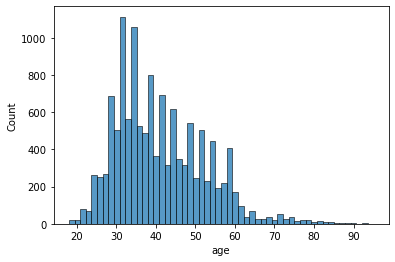

The median age is: 39.0


In [15]:
# Visualize age
sns.histplot(x="age", data= banking_data)
plt.show()
plt.close()

# Median age
med_age = banking_data.age.median()
print("The median age is:", med_age)

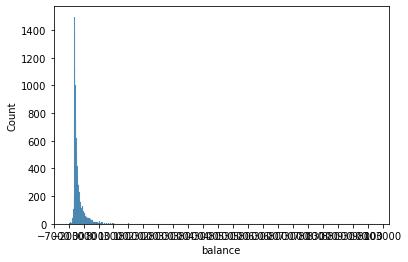

In [23]:
# Visualizing balance in people's bank account
sns.histplot(x="balance", data = banking_data)
plt.xlim([-7000, 105000])
# plt.ylim([-3, 3])
# plt.yticks(np.arange(-3, 3, 0.25))
plt.xticks(np.arange(-7000, 105000, 5000))
plt.show()
plt.close()

1810 people have loans.


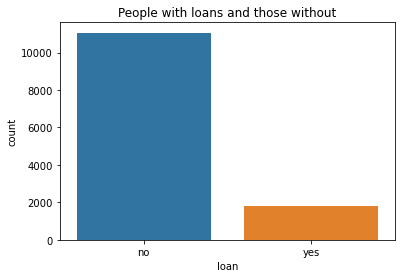

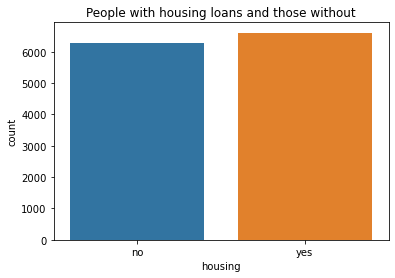

<Figure size 432x288 with 0 Axes>

In [31]:
# Number of people with loans
people_with_loans = banking_data[banking_data.loan == "yes"]

print(len(people_with_loans), "people have loans.")

# Proportion of those with loans and not
banking_data.loan.value_counts(normalize = True)

# More people don't have loans

# Visualize the people with loans(personal loans)
sns.countplot(x="loan", data = banking_data)
plt.title("People with loans and those without")
plt.show()
plt.clf()

# Visualize people with housing loans
sns.countplot(x="housing", data = banking_data)
plt.title("People with housing loans and those without")
plt.show()
plt.clf()

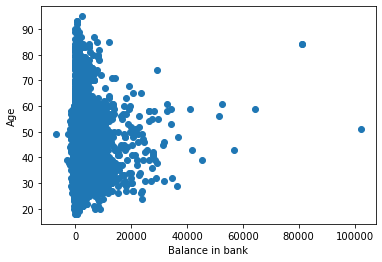

0.10198734763981507


In [36]:
# Do older people have more balance
plt.scatter(x=banking_data.balance, y=banking_data.age)
plt.xlabel("Balance in bank")
plt.ylabel("Age")
plt.show()
plt.close()

# Correlation
balance_age_correlation, r = pearsonr(banking_data.balance, banking_data.age)
print(balance_age_correlation)

# There is no association between people's age and people's account balance

In [43]:
# Average balance of people with loans
balance_people_loans = banking_data.balance[banking_data.loan == "yes"]
balance_people_without_loans = banking_data.balance[banking_data.loan == "no"]

avg_balance_people_loans = np.mean(balance_people_loans)
avg_balance_people_loans = round(avg_balance_people_loans, 2)
print("The average balance of people with loans is:",avg_balance_people_loans)

avg_balance_people_without_loans = np.mean(balance_people_without_loans)
avg_balance_people_without_loans = round(avg_balance_people_without_loans, 2)
print("The average balance of people without loans is:",avg_balance_people_without_loans)

# People without loans have more money in their bank accounts

The average balance of people with loans is: 856.65
The average balance of people without loans is: 1586.41
